In [35]:
import pandas as pd

In [69]:
rank = pd.read_csv("../data/curated/final_rank.csv").drop(columns="Unnamed: 0.1")
rank.columns = rank.columns.str.replace("Unnamed: 0", "rank")
rank["total_revenue (in hundred)"] = rank["total_revenue"] / 100

In [71]:
rank

,rank,merchant_name,merchant_abn,category,total_future_transactions,total_future_customers,total_revenue,total_earnings_of_BNPL,average fraud rate per merchant,ranking_feature,total_revenue (in hundred)
0,0,Erat Vitae LLP,24852446429,Furniture,10092.993696,3765.0,222000.698937,5602.614986,0.000000,11.000000,2220.006989
1,1,Leo In Consulting,86578477987,Toys and DIY,9558.401160,3585.0,216710.800028,5467.103402,0.000000,10.605817,2167.108000
2,2,Pede Nonummy Corp.,64203420245,"Books, Stationary and Music",8638.729255,3761.0,210401.274719,5306.925503,0.000000,10.392844,2104.012747
3,3,Non Vestibulum Industries,49891706470,"Books, Stationary and Music",8332.361090,3376.0,208637.521730,5261.102777,0.000000,9.976289,2086.375217
4,4,Dictum Phasellus In Institute,94493496784,Electronics,3551.339569,1959.0,124641.159653,3152.476601,0.261759,9.564544,1246.411597
...,...,...,...,...,...,...,...,...,...,...,...
95,95,Nulla Facilisis Institute,81761494572,Toys and DIY,851.744763,511.0,32545.403138,821.896947,0.000000,1.451920,325.454031
96,96,Varius Orci Institute,70038202360,"Books, Stationary and Music",941.747444,496.0,31544.433325,800.245389,0.000000,1.433888,315.444333
97,97,Eu Dolor Egestas PC,94472466107,Electronics,752.518218,511.0,32793.101272,821.896947,0.000000,1.433422,327.931013
98,98,Nunc In Industries,37687523474,"Books, Stationary and Music",797.841183,500.0,31788.533298,802.783065,0.000000,1.412000,317.885333


In [ ]:
# top 100 overall

In [ ]:
# For each categories

In [42]:
# category for the merchants
category_labels = rank.groupby(by="category").count().index

In [112]:
# rank for each category contained in the top 100 merchants result
rank_category = [rank[rank['category'] == cat] for cat in category_labels]

In [ ]:
# maybe check the past transaction, revenue for a partcular merchant if necessary?

In [ ]:
#average, top 5-10

In [152]:
rank.index

RangeIndex(start=0, stop=100, step=1)

In [113]:
rank.columns

Index(['rank', 'merchant_name', 'merchant_abn', 'category',
       'total_future_transactions', 'total_future_customers', 'total_revenue',
       'total_earnings_of_BNPL', 'average fraud rate per merchant',
       'ranking_feature', 'total_revenue (in hundred)'],
      dtype='object')

total_revenue (in hundred)          693.611519
total_future_customers                 1089.38
total_earnings_of_BNPL             1763.327762
total_future_transactions          2092.230393
average fraud rate per merchant       0.026413
merchant_name                          average
dtype: object

<AxesSubplot:ylabel='merchant_name'>

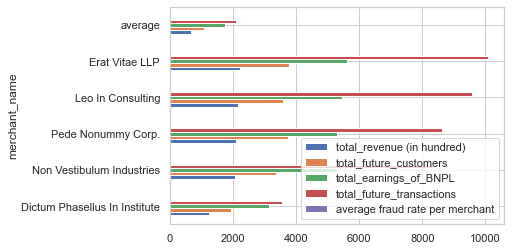

In [156]:
# calculate the average
avg_rank = rank.loc[:,["total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average fraud rate per merchant"]].mean()
avg_rank["merchant_name"] = "average"

# 4, 3, 2, 1, 0
# get top 5 merchants
data = rank.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average fraud rate per merchant"]]

# add average of top 100 merchants for comparison
data = data.append(avg_rank, ignore_index = True)

# label by merchant name
data = data.set_index("merchant_name")
data.plot.barh()

In [127]:
rank_category[0].sort_values("rank").reset_index(drop=True)

,rank,merchant_name,merchant_abn,category,total_future_transactions,total_future_customers,total_revenue,total_earnings_of_BNPL,average fraud rate per merchant,ranking_feature,total_revenue (in hundred)
0,32,Lacus Aliquam Corporation,31334588839,"Beauty, Health, Personal and Household",16.418083,4.0,252.289947,6.371294,0.244294,3.672522,2.522899
1,45,Euismod In Corp.,35223308778,"Beauty, Health, Personal and Household",1688.662982,940.0,59792.717393,1509.996717,0.000000,2.697216,597.927174
2,51,Amet Consulting,84703983173,"Beauty, Health, Personal and Household",1489.361510,872.0,55503.788297,1401.684716,0.000000,2.487465,555.037883
3,52,Feugiat Sed Nec Institute,46298404088,"Beauty, Health, Personal and Household",1356.078237,872.0,55506.064936,1401.684716,0.000000,2.461128,555.060649
4,53,Tristique Pellentesque Inc.,76626119831,"Beauty, Health, Personal and Household",1274.528547,833.0,52980.888829,1337.971774,0.000000,2.345587,529.808888
5,56,Eleifend PC,67400260923,"Beauty, Health, Personal and Household",1247.690713,821.0,52471.717123,1318.857892,0.000000,2.311336,524.717171
6,57,Arcu Sed Eu Incorporated,35909341340,"Beauty, Health, Personal and Household",1294.861678,801.0,50893.504230,1286.310765,0.000000,2.268511,508.935042
7,62,Et Nunc Consulting,41944909975,"Beauty, Health, Personal and Household",1132.456195,769.0,49001.175627,1236.031068,0.000000,2.157426,490.011756
8,63,Aliquam Auctor Associates,68559320474,"Beauty, Health, Personal and Household",1198.500293,753.0,47935.089893,1210.545891,0.000000,2.130141,479.350899
9,71,Eu Inc.,42355028515,"Beauty, Health, Personal and Household",1092.575659,682.0,43641.568985,1095.862596,0.000000,1.930742,436.415690


<AxesSubplot:ylabel='merchant_name'>

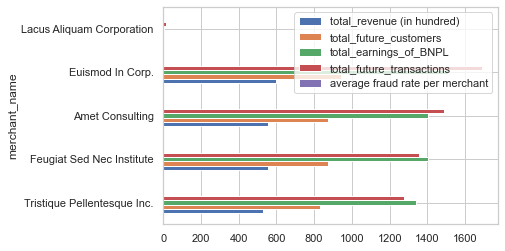

In [129]:
### Check this later
# make sure it is ordered byt the rank 
data = rank_category[0].sort_values("rank").reset_index(drop=True)
data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average fraud rate per merchant"]].set_index("merchant_name")
data.plot.barh()

<AxesSubplot:ylabel='merchant_name'>

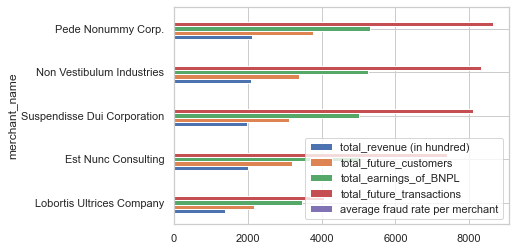

In [130]:
# make sure it is ordered byt the rank 
data = rank_category[1].sort_values("rank").reset_index(drop=True)
data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average fraud rate per merchant"]].set_index("merchant_name")
data.plot.barh()

<AxesSubplot:ylabel='merchant_name'>

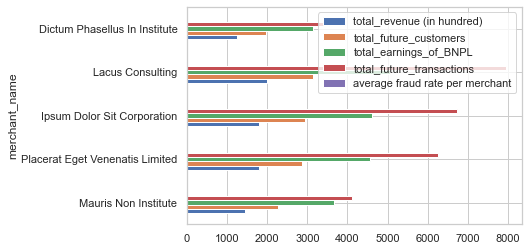

In [131]:
# make sure it is ordered byt the rank 
data = rank_category[2].sort_values("rank").reset_index(drop=True)
data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average fraud rate per merchant"]].set_index("merchant_name")
data.plot.barh()

<AxesSubplot:ylabel='merchant_name'>

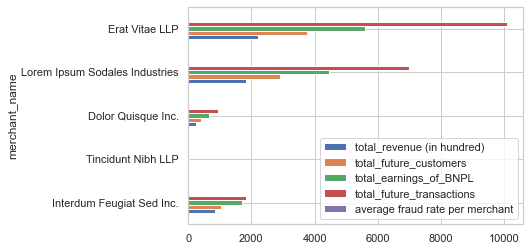

In [132]:
# make sure it is ordered byt the rank 
data = rank_category[3].sort_values("rank").reset_index(drop=True)
data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average fraud rate per merchant"]].set_index("merchant_name")
data.plot.barh()

<AxesSubplot:ylabel='merchant_name'>

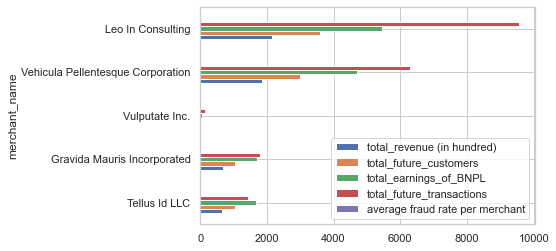

In [133]:
# make sure it is ordered byt the rank 
data = rank_category[4].sort_values("rank").reset_index(drop=True)
data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average fraud rate per merchant"]].set_index("merchant_name")
data.plot.barh()

In [ ]:
# for each category, title,

In [ ]:
'''# reference: https://seaborn.pydata.org/examples/part_whole_bars.html
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

data = rank.loc[[5,4,3,2,1],["merchant_name","total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average fraud rate per merchant"]]

# Plot the total future customer
sns.set_color_codes("sea")
sns.barplot(x="total_future_customers", y="merchant_name", data=data,
            label="Total Future Customers", color="b", orient = 'h')

# Plot the 
sns.set_color_codes("muted")
sns.barplot(x="total_future_transactions", y="merchant_name", data=data,
            label="Total Future Transactions", orient = 'h')


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="Merchant Name",
       xlabel="values")
sns.despine(left=True, bottom=True)
'''